In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


In [2]:
excel_file = 'BTC-USD-new.xlsx'
data = pd.read_excel(excel_file)
(data.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-16,345.673004,345.859009,327.062012,327.062012,327.062012,30864900
1,2014-12-17,326.855011,333.954010,315.152008,319.776001,319.776001,37567900
2,2014-12-18,319.785004,323.709015,304.231995,311.395996,311.395996,39173000
3,2014-12-19,311.178986,318.532990,306.769012,317.842987,317.842987,23823100
4,2014-12-20,317.618988,330.325012,316.044006,329.955994,329.955994,20856700


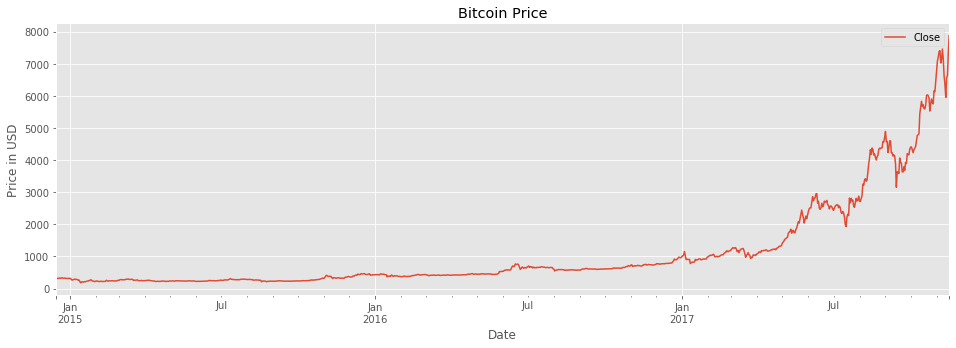

In [3]:
data.plot(x = 'Date',y = 'Close',figsize=(16,5))

plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price')
plt.savefig('btcprice.png')
plt.show()

In [4]:
data = data.set_index("Date")
data = data.set_index(pd.to_datetime(data.index))


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

In [6]:
(data.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-16,0.023216,0.017294,0.021720,0.019361,0.019361,0.002570
2014-12-17,0.020627,0.015759,0.020057,0.018414,0.018414,0.003319
2014-12-18,0.019655,0.014438,0.018532,0.017325,0.017325,0.003499
2014-12-19,0.018471,0.013771,0.018886,0.018163,0.018163,0.001784
2014-12-20,0.019357,0.015291,0.020182,0.019738,0.019738,0.001452


In [7]:
data.shape

(1067, 6)

In [8]:
 data = data.values.tolist()

In [9]:
data[0][3]

0.01936145208785464

In [11]:
X = []
Y = []
seq_len = 40
num_records = len(data) - seq_len

for i in range(num_records):
    X.append(data[i:i+seq_len])
    Y.append(data[i+seq_len][3])
X = np.array(X)


Y = np.array(Y)

In [12]:
X[1]

array([[2.06271511e-02, 1.57592239e-02, 2.00570277e-02, 1.84144282e-02,
        1.84144282e-02, 3.31943524e-03],
       [1.96546515e-02, 1.44382519e-02, 1.85322440e-02, 1.73252086e-02,
        1.73252086e-02, 3.49878626e-03],
       [1.84708692e-02, 1.37708641e-02, 1.88864928e-02, 1.81631781e-02,
        1.81631781e-02, 1.78361575e-03],
       [1.93567098e-02, 1.52913071e-02, 2.01815792e-02, 1.97376072e-02,
        1.97376072e-02, 1.45215550e-03],
       [2.09968915e-02, 1.52015643e-02, 2.05807885e-02, 1.85531133e-02,
        1.85531133e-02, 8.20935118e-04],
       [1.98311303e-02, 1.57802400e-02, 2.07933047e-02, 1.99884644e-02,
        1.99884644e-02, 1.61511452e-03],
       [2.13371971e-02, 1.60600339e-02, 2.20747082e-02, 2.03375870e-02,
        2.03375870e-02, 9.73636569e-04],
       [2.16629239e-02, 1.58606966e-02, 2.09234427e-02, 1.87729080e-02,
        1.87729080e-02, 8.08051701e-04],
       [1.99986721e-02, 1.43042847e-02, 2.03092032e-02, 1.83146041e-02,
        1.83146041e-02, 

In [13]:
Y[1]

0.012396037855187461

In [14]:
X.shape

(1027, 40, 6)

In [15]:
Y.shape

(1027,)

In [16]:
nsamples, nx, ny = X.shape
d2_train_dataset = X.reshape((nsamples,nx*ny))

In [17]:
d2_train_dataset.shape

(1027, 240)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linreg = LinearRegression().fit(d2_train_dataset, Y)

In [20]:
print('linear model coeff (w): {}' .format(linreg.coef_)) 
print('linear model intercept (b): {}' .format(linreg.intercept_))

linear model coeff (w): [ 1.67497007e-01  1.84029865e-01 -6.27446935e-02  2.85768530e+00
  2.85768530e+00 -6.17148970e-05 -5.58087509e+00 -2.12006240e-01
  2.17343867e-01  4.06726926e-01  4.06726926e-01 -5.96926916e-02
 -1.05027537e+00  7.49101608e-01  2.77321908e-01 -1.56989775e+00
 -1.56989775e+00  1.53192787e-02  2.12373056e+00 -5.61919747e-02
  5.17680239e-01 -4.09950425e-01 -4.09950425e-01  8.87198276e-02
 -1.59806179e-01  6.09351023e-01  8.97201207e-01 -6.41949982e-01
 -6.41949982e-01  8.19391871e-02  1.91604096e-01  3.22389631e-01
 -5.95652242e-02  7.75461118e-02  7.75461118e-02 -7.63480694e-02
  1.87874434e-01 -8.42908629e-01 -3.89294348e-02  1.33387327e+00
  1.33387327e+00  5.99474955e-02 -2.74305257e+00  6.77544125e-01
  3.45731164e-01  1.79910082e-01  1.79910082e-01 -7.08886217e-02
 -5.57265458e-01 -4.66512105e-01 -3.26591922e-01 -2.30274445e-01
 -2.30274445e-01  2.27263878e-02  1.11561587e+00 -1.36090410e-01
  3.14364465e-01  3.86297712e-01  3.86297712e-01  1.81006775e-01
 

In [21]:
excel_file1 = 'BTC-USD-test-new.xlsx'
data_test = pd.read_excel(excel_file1)
(data_test.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-17,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4651670016
1,2017-11-18,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3667190016
2,2017-11-19,7766.029785,8101.910156,7694.100098,8036.490234,8036.490234,3149319936
3,2017-11-20,8039.069824,8336.860352,7949.359863,8200.639648,8200.639648,3488450048
4,2017-11-21,8205.740234,8348.660156,7762.709961,8071.259766,8071.259766,4277609984


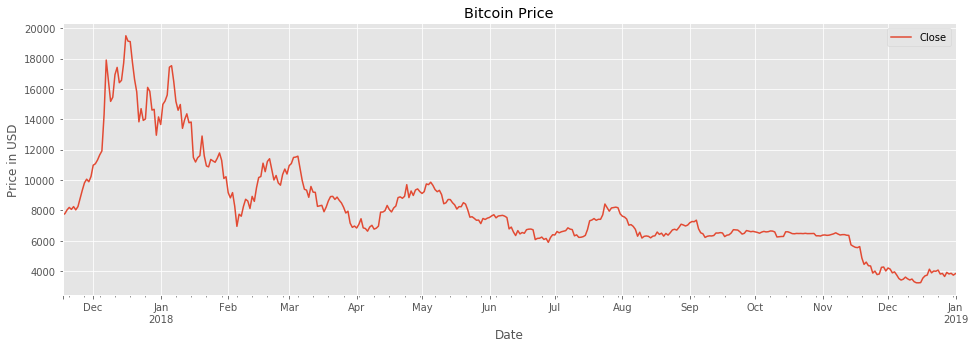

In [22]:
data_test.plot(x = 'Date',y = 'Close',figsize=(16,5))

plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price')
plt.savefig('btcprice.png')
plt.show()

In [23]:
data_test = data_test.set_index("Date")
data_test = data_test.set_index(pd.to_datetime(data_test.index))

In [24]:
data_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-17,7853.569824,8004.589844,7561.089844,7708.990234,7708.990234,4651670016
2017-11-18,7697.209961,7884.990234,7463.439941,7790.149902,7790.149902,3667190016
2017-11-19,7766.029785,8101.910156,7694.100098,8036.490234,8036.490234,3149319936
2017-11-20,8039.069824,8336.860352,7949.359863,8200.639648,8200.639648,3488450048
2017-11-21,8205.740234,8348.660156,7762.709961,8071.259766,8071.259766,4277609984


In [25]:
data_test = pd.DataFrame(scaler.fit_transform(data_test), columns=data_test.columns, index=data_test.index)
data_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-17,0.284325,0.281273,0.276870,0.275034,0.275034,0.082611
2017-11-18,0.274696,0.274159,0.270683,0.280025,0.280025,0.035546
2017-11-19,0.278934,0.287061,0.285298,0.295175,0.295175,0.010788
2017-11-20,0.295747,0.301035,0.301471,0.305270,0.305270,0.027001
2017-11-21,0.306011,0.301736,0.289645,0.297313,0.297313,0.064728


In [26]:
data_test.shape

(411, 6)

In [27]:
data_test = data_test.values.tolist()

In [28]:
X_test = []
Y_test = []
seq_len_test = 40
num_records_test = len(data_test) - seq_len_test

for i in range(num_records_test):
    X_test.append(data_test[i:i+seq_len_test])
    Y_test.append(data_test[i+seq_len_test][3])
X_test= np.array(X_test)


Y_test = np.array(Y_test)

In [29]:
X_test.shape

(371, 40, 6)

In [30]:
Y_test.shape

(371,)

In [31]:
Nsamples, Nx, Ny = X_test.shape
d2_test_dataset = X_test.reshape((Nsamples,Nx*Ny))

In [32]:
d2_test_dataset.shape

(371, 240)

In [33]:
y_predicted = linreg.predict(d2_test_dataset)

In [34]:
y_predicted.shape

(371,)

In [35]:
Y_test[0]

0.7749842140394867

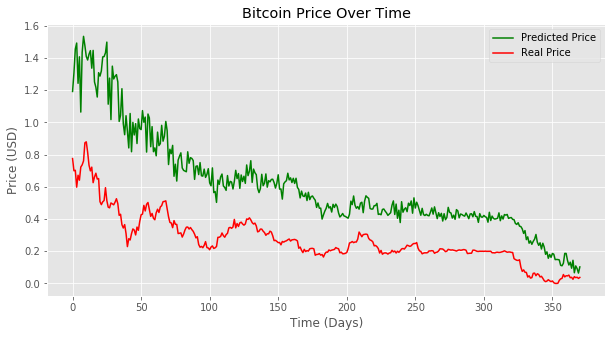

In [36]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title("Bitcoin Price Over Time")
plt.plot(y_predicted, color = 'green', label = 'Predicted Price')
plt.plot(Y_test, color = 'red', label = 'Real Price')
ax.set_ylabel("Price (USD)")
ax.set_xlabel("Time (Days)")
ax.legend()